In [1]:
import numpy as np
import torch
import torchvision
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('~/Downloads/mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('~/Downloads/mnis', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

In [3]:
idx = np.arange(0, len(trainset.train_labels), 1) < 30

/Users/aboettcher/.miniconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [4]:
trainset.targets = trainset.targets[idx]
trainset.data = trainset.data[idx]

In [5]:
trainset

Dataset MNIST
    Number of datapoints: 30
    Root location: /Users/aboettcher/Downloads/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

# Defining a Convolutional Neural Network

In [6]:
input_size = 784
hidden_sizes = [2000, 2000]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=2000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2000, out_features=2000, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2000, out_features=2000, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2000, out_features=2000, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2000, out_features=10, bias=True)
  (9): Softmax(dim=1)
)


In [7]:
image_number = 0
trainset[image_number][0].numpy().shape  # C x W x H

(1, 28, 28)

In [8]:
trainset[image_number][0].numpy().flatten().shape

(784,)

## plot a sample from the data set

In [9]:
def plot_sample(image_number=0):
    f, axs = plt.subplots(1, 2 ,figsize=(10, 5))
    axs[0].imshow(trainset[image_number][0][0].numpy())
    axs[0].set_title(f"label: {trainset[image_number][1]}")
    axs[0].set_axis_off()
    axs[1].bar(range(10), (model(trainset[image_number][0].reshape((1, 784)))).detach().numpy()[0])
    axs[1].set_ylabel("prediction probablity")
    axs[1].set_xlabel("class")
    plt.show()
interact(plot_sample, image_number=(0, 20))

interactive(children=(IntSlider(value=0, description='image_number', max=20), Output()), _dom_classes=('widget…

<function __main__.plot_sample(image_number=0)>

## see the prediction of the number with random weights

<BarContainer object of 10 artists>

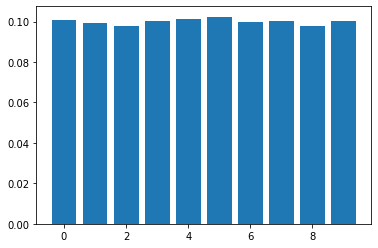

In [10]:
plt.bar(range(10), (model(trainset[image_number][0].reshape((1, 784)))).detach().numpy()[0])

## train the network

In [12]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5, momentum=0.5)

n_epochs = 200
for epoch_number in range(n_epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        if epoch_number % 10 == 0:
            val_running_loss = 0.
            for images, labels in valloader:
                images = images.view(images.shape[0], -1)
                output = model(images)
                loss = loss_function(output, labels)
                val_running_loss += loss.item()

            print("Epoch {} - Training loss: {}, Val loss: {}".format(epoch_number, running_loss/len(trainloader), val_running_loss/len(valloader)))

Epoch 0 - Training loss: 2.265017032623291, Val loss: 2.2962800757900164
Epoch 10 - Training loss: 2.1033496856689453, Val loss: 2.231686857855244
Epoch 20 - Training loss: 1.964534878730774, Val loss: 2.1858101771895293
Epoch 30 - Training loss: 1.8455528020858765, Val loss: 2.118870968271972
Epoch 40 - Training loss: 1.7673945426940918, Val loss: 2.0994830898418546
Epoch 50 - Training loss: 1.7113745212554932, Val loss: 2.088088748561349
Epoch 60 - Training loss: 1.6673202514648438, Val loss: 2.0367823322867133
Epoch 70 - Training loss: 1.6204400062561035, Val loss: 2.0094991428836897
Epoch 80 - Training loss: 2.327808380126953, Val loss: 2.3628228561134095
Epoch 90 - Training loss: 2.327817440032959, Val loss: 2.362822857631999
Epoch 100 - Training loss: 2.327817440032959, Val loss: 2.362822857631999


KeyboardInterrupt: 

## check again the prediction with the trained weights

In [ ]:
def plot_sample(image_number=0):
    f, axs = plt.subplots(1, 2 ,figsize=(10, 5))
    axs[0].imshow(trainset[image_number][0][0].numpy())
    axs[0].set_title(f"label: {trainset[image_number][1]}")
    axs[0].set_axis_off()
    axs[1].bar(range(10), (model(trainset[image_number][0].reshape((1, 784)))).detach().numpy()[0])
    axs[1].set_ylabel("prediction probablity")
    axs[1].set_xlabel("class")
interact(plot_sample, image_number=(0, 20))

In [ ]:
def plot_sample(image_number=0):
    f, axs = plt.subplots(1, 2 ,figsize=(10, 5))
    axs[0].imshow(valset[image_number][0][0].numpy())
    axs[0].set_title(f"label: {valset[image_number][1]}")
    axs[0].set_axis_off()
    axs[1].bar(range(10), (model(valset[image_number][0].reshape((1, 784)))).detach().numpy()[0])
    axs[1].set_ylabel("prediction probablity")
    axs[1].set_xlabel("class")
interact(plot_sample, image_number=(0, 50))